In [1]:
import time
start_time=time.time()

In [2]:
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import interpolate
import numpy as np
import pandas as pd
import json

from astropy.io import fits
import astropy.units as u

#plt.rcParams["font.family"]="Times New Roman"
#plt.rcParams["font.size"]="20"

Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'Hanel-EON-H-RV'

In [8]:
name_export='Hanel-EON-H'

Input data of the region

In [9]:
dist = 410 #parsecs
pix = 1.0 #arcmin 
seeing = 0.9 #seeing arcsec FWHM

In [10]:
pc = dist*(2*np.pi) / (360 * 60) #arcsec to parsecs
s0 = (seeing*pc)/2.355 #seeing pc RMS
pc,s0

(0.11926416555294585, 0.045578661994756374)

In [11]:
orion=pd.read_table(str(datapath_obs)+ '/' +data_file+'.csv', delimiter=',',header=None)
orion.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,22.783333,21.133333,20.158333,14.679167,10.941667,11.520833,7.633333,5.579167,3.266667,5.970833,...,5.637500,4.445833,9.566667,11.191667,14.800000,14.583333,16.033333,22.750000,23.145833,23.366667
std,7.540538,8.900692,9.664859,12.537109,12.189515,12.760536,12.702539,11.862948,8.842716,11.541663,...,13.012296,13.676097,14.611480,14.203579,13.664616,13.801943,12.987709,7.639372,6.292644,5.553743
min,-3.900000,-2.500000,0.600000,-3.500000,-1.000000,-2.900000,-4.500000,-7.000000,-3.100000,-3.900000,...,-7.400000,-9.100000,-6.400000,-6.000000,-6.100000,-5.100000,-4.600000,-3.700000,1.500000,3.800000
25%,25.000000,25.000000,25.000000,0.550000,0.575000,-0.600000,-2.325000,-2.550000,-2.325000,-2.100000,...,-3.150000,-5.000000,-4.725000,-2.625000,-2.200000,-1.925000,-0.175000,25.000000,25.000000,25.000000
50%,25.000000,25.000000,25.000000,25.000000,2.300000,4.100000,0.300000,-0.150000,-0.300000,0.200000,...,-1.900000,-2.100000,1.100000,14.050000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
75%,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,11.950000,4.300000,12.925000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
max,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000


In [12]:
#orion[orion == 25] = 'nan' 

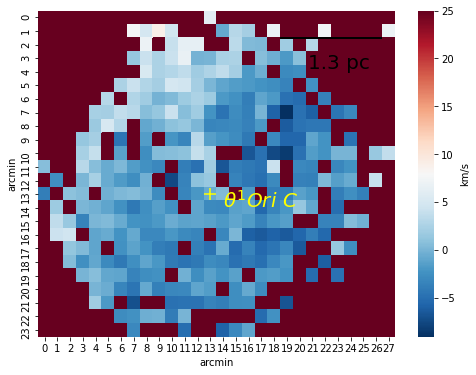

In [13]:
fig, ax = plt.subplots(figsize = (8,6))

sns.heatmap(orion,cmap='RdBu_r',cbar_kws={'label': 'km/s'})

plt.scatter(13.5, 13.5, marker='+', color='yellow', s=150)
ax.set(xlabel='arcmin', ylabel='arcmin')
ax.text(0.93, 0.81, '1.3 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
plt.axhline(y=2, xmin=0.68, xmax=0.96, linewidth=2, color = 'k')
plt.text(14.5, 14.5, '$θ^{1}Ori\ C$', fontsize=20, color='yellow')

plt.show()

Matrix To list

In [14]:
data=orion.stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})
data.describe()

,X,Y,RV
count,672.000000,672.000000,672.000000
mean,11.500000,13.500000,10.716071
std,6.927343,8.083764,13.270700
min,0.000000,0.000000,-9.100000
25%,5.750000,6.750000,-2.000000
50%,11.500000,13.500000,3.600000
75%,17.250000,20.250000,25.000000
max,23.000000,27.000000,25.000000


In [15]:
m=data.RV<25
data=data[m]

In [16]:
data[m].describe()

<ipython-input-16-9541acf80d3b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[m].describe()


,X,Y,RV
count,366.000000,366.000000,366.000000
mean,11.918033,12.803279,-1.226230
std,5.770862,6.106326,3.113844
min,0.000000,0.000000,-9.100000
25%,7.000000,8.000000,-3.375000
50%,12.000000,13.000000,-1.750000
75%,16.750000,17.000000,0.675000
max,23.000000,27.000000,8.900000


<ipython-input-17-ae0f6994de5e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datal=data[m].copy()


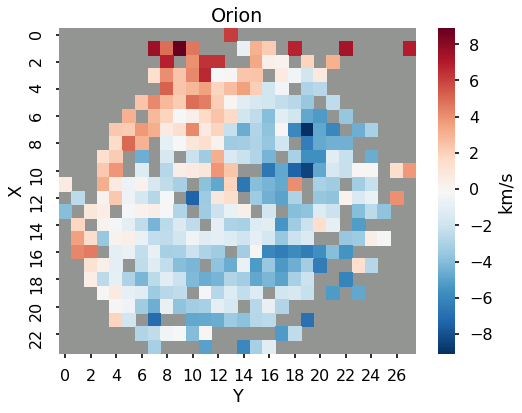

In [17]:
plt.style.use([
    "seaborn-poster",
])
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

datal=data[m].copy()

dataH_rv=(datal.round(2)).pivot(index='X', columns='Y', values='RV')
sns.heatmap(dataH_rv, cmap="RdBu_r",cbar_kws={'label': 'km/s'})
plt.title('Orion')
ax.set_facecolor('xkcd:gray')


#plt.savefig('Imgs//VF//N604.pdf', bbox_inches='tight')


Fits file

In [18]:
#hdu = fits.PrimaryHDU(dataH_rv)
#hdu.writeto(str(datapath_obs)+ '/' +data_file + '.fits')

<ipython-input-19-f0a02e76f95c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(data[m].RV-data[m].RV.mean(),bins=25)


Text(0.5, 6.799999999999979, 'Radial velocity [km/s]')

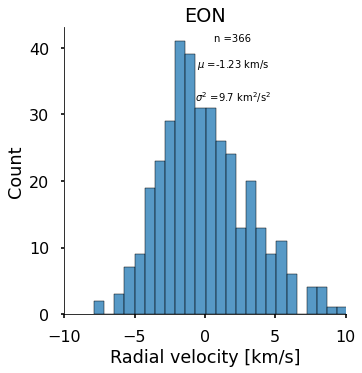

In [19]:
sns.displot(data[m].RV-data[m].RV.mean(),bins=25)
plt.xlim(-10,10)

plt.text(0.45, 0.86,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.78,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.68,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('EON')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlabel('Radial velocity [km/s]')


Export data

In [20]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
         name_export : np.array(data[m]),
      }
data_export_list

<ipython-input-20-9a1e25a474b1>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  name_export : np.array(data[m]),


{'name': 'Hanel-EON-H',
 'pc': 0.11926416555294585,
 's0': 0.045578661994756374,
 'pix': 1.0,
 'Hanel-EON-H': array([[ 0. , 13. ,  6.1],
        [ 1. ,  7. ,  7.6],
        [ 1. ,  8. ,  4.9],
        ...,
        [23. , 14. , -5.9],
        [23. , 15. , -3.1],
        [23. , 16. , -1.1]])}

In [21]:
data_export_matrix = {
       'name': name_export, 
       'pc' : pc,
       's0' : s0,
       'pix' : pix,
#       'sb' :np.array(dataH_f),
       'vv' : np.array(dataH_rv),
#       'ss' : np.array(dataH_s),

      }

data_export_matrix

{'name': 'Hanel-EON-H',
 'pc': 0.11926416555294585,
 's0': 0.045578661994756374,
 'pix': 1.0,
 'vv': array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  6.1,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  7.6,  4.9,  8.9,  4.7,
          nan,  nan,  nan, -0.8,  3.1,  2.2,  nan,  6.8,  nan,  nan,  nan,
          7.4,  nan,  nan,  nan,  nan,  7. ],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  6.9,  nan,  4. ,
          6.4,  6.4,  nan,  nan,  3.4,  0.4,  0.3,  nan,  1.9,  nan,  3.1,
          nan,  nan,  nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  1.4,  4.1,  2.5,  4.2,
          6.7, -0.1,  0. ,  2.4,  2.5,  nan,  0.7, -0.4, -1.8,  0.8,  nan,
          nan,  nan,  nan,  nan,  nan,  nan],
        [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  5.2,  2.5,  2.9,
          3.6,  1.9,  2.7,  3.6,  2.1, -1

In [22]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [23]:
jsonfilename =name_export +"-m.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_matrix, fp=f, indent=3, cls=MyEncoder)

In [24]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [25]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 5.562783718109131 seconds ---


In [26]:
!jupyter nbconvert --to script --no-prompt otv-Hanel-EON-H.ipynb

[NbConvertApp] Converting notebook otv-Hanel-EON-H.ipynb to script
[NbConvertApp] Writing 4082 bytes to otv-Hanel-EON-H.py
